# Exploring Seasonal NDVI pattern over Punjab, India for 2023

Here, I am downloading the required NDVI data using the NASA appeeaars api.

In [ ]:

# Import packages

import pathlib
import os

import earthpy
import hvplot.pandas
import hvplot.xarray
import matplotlib

import geopandas as gpd
import pandas as pd
import panel as pn
import rioxarray as rxr
import xarray as xr
import holoviews as hv
import earthpy.api.appeears as eaapp

from pathlib import Path
import matplotlib.pyplot as plt



In [8]:
# creating the directory

project = earthpy.Project('Punjab NDVI 2023', dirname='punjab_boundary')
project.project_dir


PosixPath('/workspaces/data/punjab_boundary')

In [9]:

boundary_path = Path("data/boundaries/gadm41_IND_1.shp")

adm1_gdf = gpd.read_file(boundary_path)
adm1_gdf.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,IND.1_1,IND,India,Andaman and Nicobar,Andaman & Nicobar Islands|Andama,NA,Union Territor,Union Territory,NA,IN.AN,NA,"MULTIPOLYGON (((93.79078 6.85139, 93.79092 6.8..."
1,IND.2_1,IND,India,Andhra Pradesh,NA,NA,State,State,NA,IN.AP,IN-AP,"MULTIPOLYGON (((78.73952 13.04549, 78.73218 13..."
2,IND.3_1,IND,India,Arunachal Pradesh,Agence de la Frontière du Nord-E,NA,State,State,NA,IN.AR,IN-AR,"POLYGON ((95.3683 27.10736, 95.37366 27.108, 9..."
3,Z07.3_1,Z07,India,Arunachal Pradesh,Agence de la Frontière du Nord-E,NA,State,State,NA,IN.AR,NA,"POLYGON ((94.19125 27.49632, 94.1869 27.49081,..."
4,IND.4_1,IND,India,Assam,NA,NA,State,State,NA,IN.AS,IN-AS,"POLYGON ((92.7545 24.50112, 92.75133 24.49437,..."


In [13]:
#extracting only for the state of Punjab

punjab_gdf = adm1_gdf[adm1_gdf["NAME_1"].str.contains("Punjab", case=False)].copy()
punjab_gdf


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
30,IND.28_1,IND,India,Punjab,NA,NA,State,State,NA,IN.PB,IN-PB,"POLYGON ((75.90314 29.74628, 75.89723 29.75553..."


In [14]:
#Convert to WGS84 (EPSG:4326)
punjab_gdf = punjab_gdf.to_crs(4326)
punjab_gdf.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

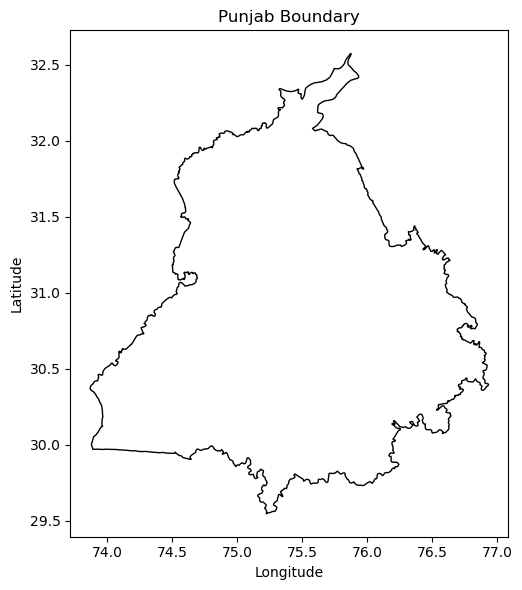

In [24]:
#verifying visually

fig, ax = plt.subplots(figsize=(6, 6))
punjab_gdf.plot(ax=ax, edgecolor="black", facecolor="none")
ax.set_title("Punjab Boundary")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()




In [28]:
import os

os.environ["EARTHDATA_USERNAME"] = "nkoppa"
os.environ["EARTHDATA_PASSWORD"] = "Nk260395#$"


In [31]:
ndvi_downloader = eaapp.AppeearsDownloader(

    # give download a name
    download_key = "punjab-ndvi-2023",

    # put data in the directory we defined
    project = project,

    # specify MODIS product
    product = 'MOD13Q1.061',
    layer = '_250m_16_days_NDVI',

    # specify full year (month-day)
    start_date = "01-01",
    end_date = "12-31",

    # recurring means apply start/end each year
    recurring = True,

    # only download year 2023
    year_range = [2023, 2023],

    # specify Punjab polygon
    polygon = punjab_gdf
)


In [32]:
# download the prepared download - this can take a while!
ndvi_downloader.download_files(cache=True)


Credentials found using 'env' backend.


HTTPError: 401 Client Error: UNAUTHORIZED for url: https://appeears.earthdatacloud.nasa.gov/api/login